**Scenario 2 – Foundation Building** 

In this scenario, the logistics department of GLOBAL MANUFACTURING SOLUTIONS has noticed a recurring anomaly in their operations: the feeder factory in Stockholm has reported abnormally high shipment costs. This anomaly has prompted a thorough investigation. The logistics team is interested in uncovering the root cause of this issue. Why is Stockholm's shipment cost so high? What factors are contributing to this anomaly? The logistics team is interested in learning from actionable insights to correct this issue and ensure smooth, cost-effective operations moving forward.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# from geopy.distance import geodesic
import numpy as np

plt.style.use('ggplot')

In [ ]:
# Load all sheets into a dictionary
file_path = "./01_Class/November_2024_Transportation_Dataset.xlsx"
all_sheets = pd.read_excel(file_path, sheet_name=None)

shipments = all_sheets['November_2024_Transportation']
transport_cost = all_sheets['Transportation cost']
# Drop the 'Comments' column if it exists
if 'Comments' in transport_cost.columns:
    transport_cost = transport_cost.drop(columns=['Comments'])
routes = all_sheets['Distances']

cities = all_sheets['Cities']

In [218]:
# Adding Lead Time to the shipments DataFrame
shipments['Lead_Time'] = (
    pd.to_datetime(shipments['Delivery_Date'], format='%Y/%m/%d') 
    - pd.to_datetime(shipments['Order_Date'], format='%Y/%m/%d')
).dt.days

In [236]:
transport_cost

,Transportation mode,Fixed cost (£/km),Variable cost (£/kg)
0,Air,0.75,0.30
1,Ocean,0.35,0.05
2,Road,0.50,0.10


In [233]:
shipments.head()

,Shipment_ID,Item,Order_Date,Dispatch_Date,Expected_Delivery_Date,Delivery_Date,Transportation_Days,Origin,Destination,Weight_kg,Distance_km,Delivery_Status,Transportation_Mode,Fixed_Cost_GBP,Variable_Cost_GBP,Total_Cost_GBP,Lead_Time
0,SHP00001,PART 1,2024-11-01,2024-11-01,2024-11-29,2024-11-29,28,Hanoi,Shanghai,761,1924.459238,On-Time,Ocean,673.560733,38.05,711.610733,28
1,SHP00002,PART 2,2024-11-01,2024-11-02,2024-11-10,2024-11-10,8,Milan,Krakow,1429,953.414225,On-Time,Road,476.707113,142.90,619.607113,9
2,SHP00003,PART 2,2024-11-01,2024-11-02,2024-11-10,2024-11-10,8,Milan,Krakow,1429,953.414225,On-Time,Road,476.707113,142.90,619.607113,9
3,SHP00004,PART 1,2024-11-02,2024-11-02,2024-11-23,2024-11-23,21,Hanoi,Munich,761,8602.650679,On-Time,Ocean,3010.927738,38.05,3048.977738,21
4,SHP00005,PART 2,2024-11-02,2024-11-02,2024-11-11,2024-11-11,9,Milan,Munich,1429,348.531624,On-Time,Road,174.265812,142.90,317.165812,9


### Shipment Weight For Each Origin and Destination

In [169]:
unique_shipment_weight = shipments.groupby(['Origin', 'Destination'])['Weight_kg'].unique().reset_index()
unique_shipment_weight['Weight_kg'] = unique_shipment_weight['Weight_kg'].apply(lambda x: x[0] if len(x) == 1 else None)

unique_shipment_weight 


,Origin,Destination,Weight_kg
0,Hanoi,Chicago,761
1,Hanoi,Krakow,761
2,Hanoi,Munich,761
3,Hanoi,Shanghai,761
4,Milan,Chicago,1429
5,Milan,Krakow,1429
6,Milan,Munich,1429
7,Milan,Shanghai,1429
8,Mumbai,Chicago,246
9,Mumbai,Krakow,246


Shipment weight are constant for each origin to every destination,
- Hanoi - 761 Kg
- Milan - 1429 Kg
- Mumbai - 246 Kg
- Stockhold - 1201 Kg

### Distance Comparison from origin to destination

In [ ]:
# Group, get unique distance, flatten the list
distance_data = shipments.groupby(['Origin', 'Destination'])['Distance_km'].unique().reset_index()

distance_data['Distance_km'] = distance_data['Distance_km'].apply(lambda x: x[0])

distance_data = distance_data.sort_values('Distance_km', ascending=False).reset_index(drop=True)

distance_data

,Origin,Destination,Distance_km
0,Mumbai,Chicago,12965.655647
1,Hanoi,Chicago,12903.346212
2,Milan,Shanghai,9118.798266
3,Hanoi,Munich,8602.650679
4,Hanoi,Krakow,7958.316406
5,Stockholm,Shanghai,7781.514683
6,Milan,Chicago,7308.871730
7,Stockholm,Chicago,6899.752871
8,Mumbai,Munich,6331.220152
9,Mumbai,Krakow,5780.630865


### Transportation Days by Origin, Destination and Transportation Mode

In [178]:
shipments.groupby(['Origin', 'Destination','Transportation_Mode'])['Transportation_Days'].unique().reset_index()

,Origin,Destination,Transportation_Mode,Transportation_Days
0,Hanoi,Chicago,Air,"[0, 1, 2]"
1,Hanoi,Chicago,Ocean,"[17, 15, 5, 7, 6, 13, 8, 10, 11, 9]"
2,Hanoi,Krakow,Air,[0]
3,Hanoi,Krakow,Ocean,"[9, 5, 13, 14, 6, 11, 8]"
4,Hanoi,Munich,Air,[0]
5,Hanoi,Munich,Ocean,"[21, 8, 17, 18, 10, 11, 15, 6, 9]"
6,Hanoi,Shanghai,Air,"[5, 0]"
7,Hanoi,Shanghai,Ocean,"[28, 21]"
8,Hanoi,Shanghai,Road,"[15, 6, 7]"
9,Milan,Chicago,Air,"[3, 0]"


#### Checking the 0 Transportation days

In [182]:
shipments.query("Transportation_Days > 0 and Transportation_Mode == 'Air'").head()

,Shipment_ID,Item,Order_Date,Dispatch_Date,Expected_Delivery_Date,Delivery_Date,Transportation_Days,Origin,Destination,Weight_kg,Distance_km,Delivery_Status,Transportation_Mode,Fixed_Cost_GBP,Variable_Cost_GBP,Total_Cost_GBP
8,SHP00009,PART 1,2024-11-02,2024-11-02,2024-11-07,2024-11-07,5,Hanoi,Shanghai,761,1924.459238,On-Time,Air,1443.344429,228.3,1671.644429
12,SHP00013,PART 4,2024-11-03,2024-11-03,2024-11-10,2024-11-10,7,Stockholm,Chicago,1201,6899.752871,On-Time,Air,5174.814654,360.3,5535.114654
19,SHP00020,PART 2,2024-11-04,2024-11-04,2024-11-06,2024-11-06,2,Milan,Munich,1429,348.531624,On-Time,Air,261.398718,428.7,690.098718
35,SHP00036,PART 2,2024-11-07,2024-11-07,2024-11-10,2024-11-10,3,Milan,Munich,1429,348.531624,On-Time,Air,261.398718,428.7,690.098718
41,SHP00042,PART 4,2024-11-03,2024-11-08,2024-11-17,2024-11-17,9,Stockholm,Shanghai,1201,7781.514683,On-Time,Air,5836.136012,360.3,6196.436012


### Transportation Mode Count for Each Origin

In [185]:
shipments.groupby(['Origin', 'Destination'])['Transportation_Mode'].value_counts().reset_index(name='Count').sort_values(by=['Origin','Destination','Count'], ascending=False).reset_index(drop=True)

,Origin,Destination,Transportation_Mode,Count
0,Stockholm,Shanghai,Air,34
1,Stockholm,Shanghai,Ocean,4
2,Stockholm,Munich,Road,18
3,Stockholm,Munich,Air,12
4,Stockholm,Krakow,Road,21
5,Stockholm,Krakow,Air,10
6,Stockholm,Chicago,Air,20
7,Stockholm,Chicago,Ocean,6
8,Mumbai,Shanghai,Ocean,21
9,Mumbai,Shanghai,Air,12


Stockholm ship their product mostly by Air

### Transport Days Average for each Transport Mode

In [197]:
shipments.groupby(['Origin', 'Destination','Transportation_Mode'])['Transportation_Days'].mean().reset_index()

,Origin,Destination,Transportation_Mode,Transportation_Days
0,Hanoi,Chicago,Air,0.600000
1,Hanoi,Chicago,Ocean,8.487179
2,Hanoi,Krakow,Air,0.000000
3,Hanoi,Krakow,Ocean,7.933333
4,Hanoi,Munich,Air,0.000000
5,Hanoi,Munich,Ocean,8.629630
6,Hanoi,Shanghai,Air,0.416667
7,Hanoi,Shanghai,Ocean,24.500000
8,Hanoi,Shanghai,Road,6.833333
9,Milan,Chicago,Air,0.545455


### Lead Time Average

In [219]:
shipments.groupby(['Origin', 'Destination','Transportation_Mode'])['Lead_Time'].mean().reset_index()

,Origin,Destination,Transportation_Mode,Lead_Time
0,Hanoi,Chicago,Air,5.200000
1,Hanoi,Chicago,Ocean,11.179487
2,Hanoi,Krakow,Air,5.200000
3,Hanoi,Krakow,Ocean,12.000000
4,Hanoi,Munich,Air,6.416667
5,Hanoi,Munich,Ocean,12.407407
6,Hanoi,Shanghai,Air,5.166667
7,Hanoi,Shanghai,Ocean,24.500000
8,Hanoi,Shanghai,Road,13.833333
9,Milan,Chicago,Air,4.454545


### Stockholm Shipment Count and Average Cost by Destination and Transportation Mode

In [235]:
summary = shipments.query("Origin == 'Stockholm'") \
    .groupby(['Origin', 'Destination', 'Transportation_Mode']) \
    .agg(
        count_shipments=('Shipment_ID', 'count'),
        total_cost=('Total_Cost_GBP', 'sum'),
        mean_weight=('Weight_kg', 'mean'),
        mean_distance=('Distance_km', 'mean')
    )

summary['percentage_transport'] = (
    summary.groupby('Destination')['count_shipments']
    .transform(lambda x: round(x / x.sum(), 2))
)

summary

count_shipments     total_cost  \
Origin    Destination Transportation_Mode                                   
Stockholm Chicago     Air                               20  110702.293071   
                      Ocean                              6   14849.781030   
          Krakow      Air                               10   11390.045139   
                      Road                              21   13423.963194   
          Munich      Air                               12   16166.587784   
                      Road                              18   14004.787784   
          Shanghai    Air                               34  210678.824409   
                      Ocean                              4   11134.320556   

                                           mean_weight  mean_distance  \
Origin    Destination Transportation_Mode                               
Stockholm Chicago     Air                       1201.0    6899.752871   
                      Ocean                     1201.0    6899.752871   
          Krakow      Air                       1201.0    1038.272685   
                      Road                      1201.0    1038.272685   
          Munich      Air                       1201.0    1315.887532   
                      Road                      1201.0    1315.887532   
          Shanghai    Air                       1201.0    7781.514683   
                      Ocean                     1201.0    7781.514683   

                                           percentage_transport  
Origin    Destination Transportation_Mode                        
Stockholm Chicago     Air                                  0.77  
                      Ocean                                0.23  
          Krakow      Air                                  0.32  
                      Road                                 0.68  
          Munich      Air                                  0.40  
                      Road                                 0.60  
          Shanghai    Air                                  0.89  
                      Ocean                                0.11

In [ ]:
import pandas as pd

# ----------------------------------------
# 0. Your data preparation
# ----------------------------------------

# Assuming you already have this:
summary = shipments.query("Origin == 'Stockholm'") \
    .groupby(['Origin', 'Destination', 'Transportation_Mode']) \
    .agg(
        count_shipments=('Shipment_ID', 'count'),
        total_cost=('Total_Cost_GBP', 'sum'),
        mean_weight=('Weight_kg', 'mean'),
        mean_distance=('Distance_km', 'mean')
    )

summary['percentage_transport'] = (
    summary.groupby('Destination')['count_shipments']
    .transform(lambda x: round(x / x.sum(), 2))
)

# Transport cost parameters
transport_costs = {
    'Air': {'fixed': 0.75, 'variable': 0.30},
    'Ocean': {'fixed': 0.35, 'variable': 0.05},
    'Road': {'fixed': 0.50, 'variable': 0.10}
}

# Route-mode availability
mode_matrix_data = [
    ('Stockholm', 'Chicago', 'Air'),
    ('Stockholm', 'Chicago', 'Ocean'),
    ('Stockholm', 'Krakow', 'Air'),
    ('Stockholm', 'Krakow', 'Road'),
    ('Stockholm', 'Munich', 'Air'),
    ('Stockholm', 'Munich', 'Road'),
    ('Stockholm', 'Shanghai', 'Air'),
    ('Stockholm', 'Shanghai', 'Ocean'),
]

mode_matrix = pd.DataFrame(mode_matrix_data, columns=['Origin', 'Destination', 'Transportation_Mode'])

# Merge to get available modes only
summary_reset = summary.reset_index()
merged = pd.merge(
    summary_reset,
    mode_matrix,
    how='inner',
    on=['Origin', 'Destination', 'Transportation_Mode']
)

# Calculate cost per shipment
def calculate_cost_per_shipment(row):
    mode = row['Transportation_Mode']
    fixed = transport_costs[mode]['fixed']
    variable = transport_costs[mode]['variable']
    return row['mean_distance'] * fixed + row['mean_weight'] * variable

merged['cost_per_shipment'] = merged.apply(calculate_cost_per_shipment, axis=1)

# ----------------------------------------
# 1. Simulate varying percentages (1% steps)
# ----------------------------------------

simulation_results = []

# Now define percentages at 1% step (0%, 1%, 2%, ..., 100%)
percentages = np.linspace(0, 1, 101)  # 101 points from 0.00 to 1.00

for destination in merged['Destination'].unique():
    dest_df = merged[merged['Destination'] == destination]
    available_modes = dest_df['Transportation_Mode'].tolist()
    count_shipments = dest_df['count_shipments'].sum()  # total shipments for destination

    if len(available_modes) == 2:
        mode1, mode2 = available_modes
        
        cost1 = dest_df.loc[dest_df['Transportation_Mode'] == mode1, 'cost_per_shipment'].values[0]
        cost2 = dest_df.loc[dest_df['Transportation_Mode'] == mode2, 'cost_per_shipment'].values[0]
        
        for pct1 in percentages:
            pct2 = 1 - pct1  # remainder for second mode
            
            expected_total_cost = count_shipments * (pct1 * cost1 + pct2 * cost2)
            
            simulation_results.append({
                'Destination': destination,
                f'{mode1} %': round(pct1 * 100),
                f'{mode2} %': round(pct2 * 100),
                'Expected Total Cost (£)': expected_total_cost
            })

# ----------------------------------------
# 2. Final simulation DataFrame
# ----------------------------------------

simulation_df = pd.DataFrame(simulation_results)

# Show the simulation result
print(simulation_df)



,Destination,Air %,Ocean %,Expected Total Cost (£),Road %
0,Chicago,0,100.0,64349.051130,NaN
1,Chicago,1,99.0,65144.690428,NaN
2,Chicago,2,98.0,65940.329727,NaN
3,Chicago,3,97.0,66735.969025,NaN
4,Chicago,4,96.0,67531.608324,NaN
...,...,...,...,...,...
399,Shanghai,96,4.0,230277.027530,NaN
400,Shanghai,97,3.0,231573.912761,NaN
401,Shanghai,98,2.0,232870.797993,NaN
402,Shanghai,99,1.0,234167.683225,NaN


In [258]:
dest_df

,Destination,Air %,Ocean %,Expected Total Cost (£),Road %
303,Shanghai,0,100.0,105776.045280,NaN
304,Shanghai,1,99.0,107072.930512,NaN
305,Shanghai,2,98.0,108369.815743,NaN
306,Shanghai,3,97.0,109666.700975,NaN
307,Shanghai,4,96.0,110963.586207,NaN
...,...,...,...,...,...
399,Shanghai,96,4.0,230277.027530,NaN
400,Shanghai,97,3.0,231573.912761,NaN
401,Shanghai,98,2.0,232870.797993,NaN
402,Shanghai,99,1.0,234167.683225,NaN


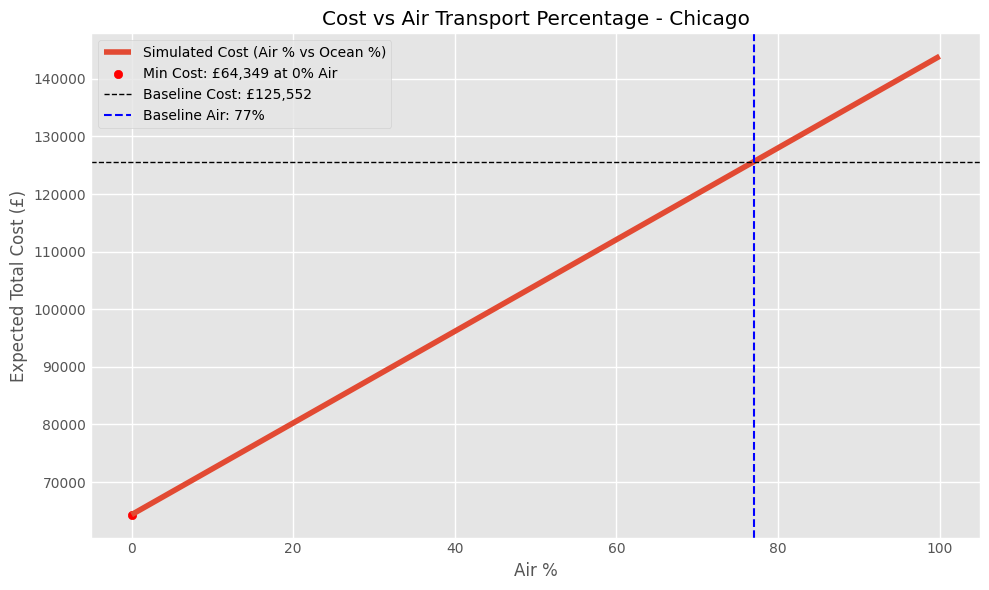

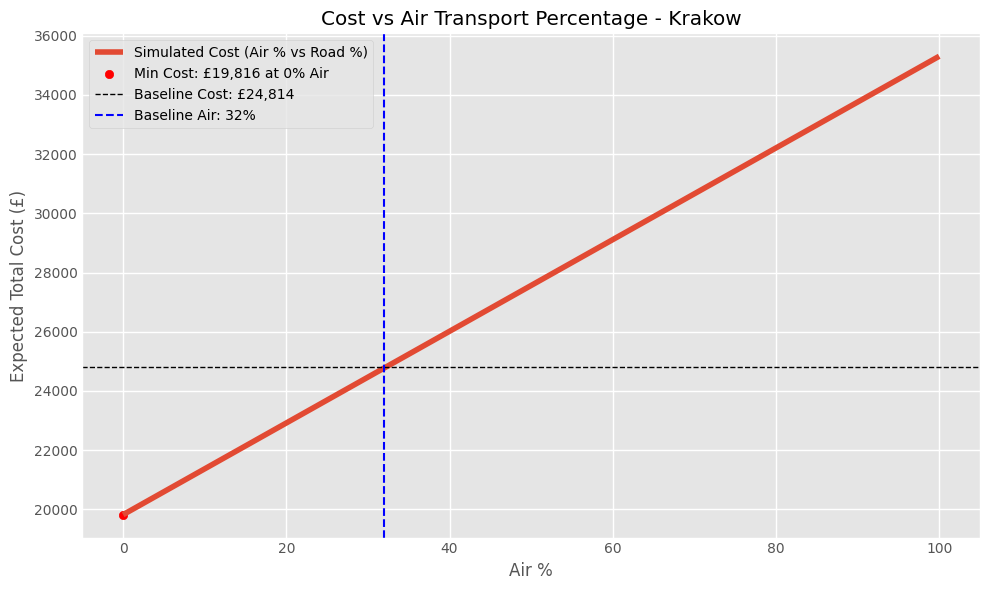

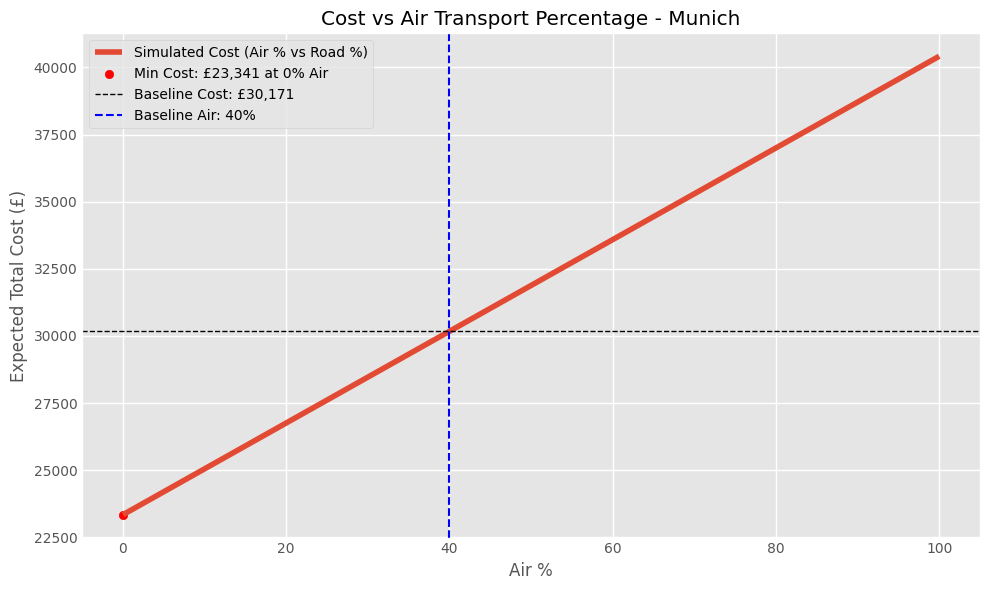

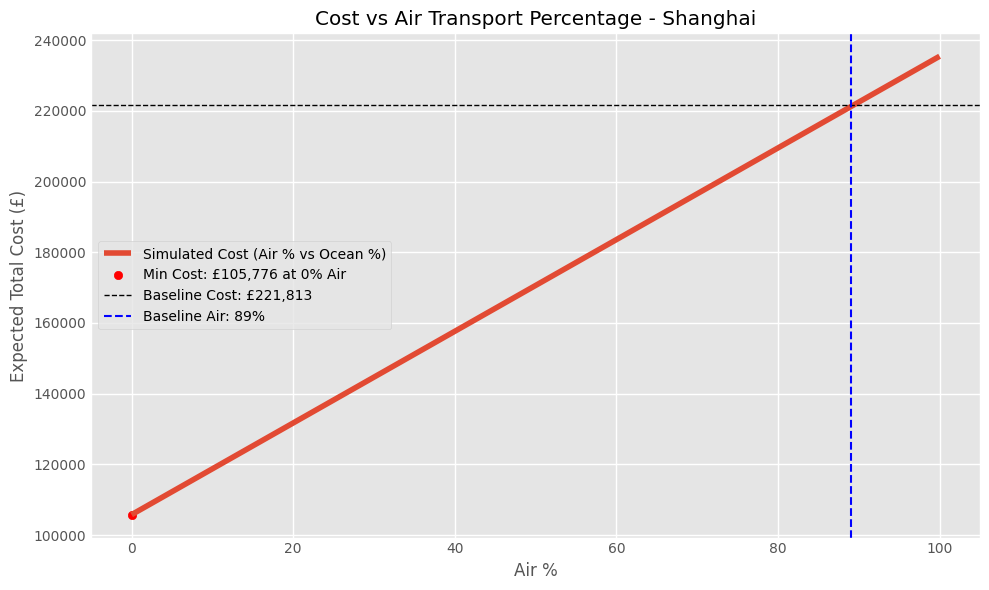

In [278]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# For each destination
for destination in simulation_df['Destination'].unique():
    dest_df = simulation_df[simulation_df['Destination'] == destination]
    
    mode_columns = sorted([col for col in dest_df.columns if col.endswith('%') and not dest_df[col].isnull().all()])

    mode1 = mode_columns[0]
    mode2 = mode_columns[1]
    
    plt.figure(figsize=(10, 6))
    
    # Plot: Expected Cost vs Mode1 %
    plt.plot(dest_df[mode1], dest_df['Expected Total Cost (£)'], label=f'Simulated Cost ({mode1} vs {mode2})')

    # Highlight minimum cost point
    min_idx = dest_df['Expected Total Cost (£)'].idxmin()
    best_x = dest_df.loc[min_idx, mode1]
    best_y = dest_df.loc[min_idx, 'Expected Total Cost (£)']
    plt.scatter(best_x, best_y, color='red', label=f'Min Cost: £{best_y:,.0f} at {best_x:.0f}% {mode1[:-2]}')

    # Add abeline cost horizontal line
    baseline_cost = summary.query("Destination == @destination")['total_cost'].sum()
    plt.axhline(baseline_cost, color='black', linestyle='--', linewidth=1, label=f'Baseline Cost: £{baseline_cost:,.0f}')
    
    #add vertical line
    baseline_air_percentage = summary.query("Destination == @destination and Transportation_Mode == 'Air'")['percentage_transport'].values[0] * 100
    plt.axvline(baseline_air_percentage, color='blue', linestyle='--',linewidth=1.5, label=f'Baseline Air: {baseline_air_percentage:.0f}%')


    # Final plot settings
    plt.title(f'Cost vs Air Transport Percentage - {destination}')
    plt.xlabel(f'{mode1}')
    plt.ylabel('Expected Total Cost (£)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


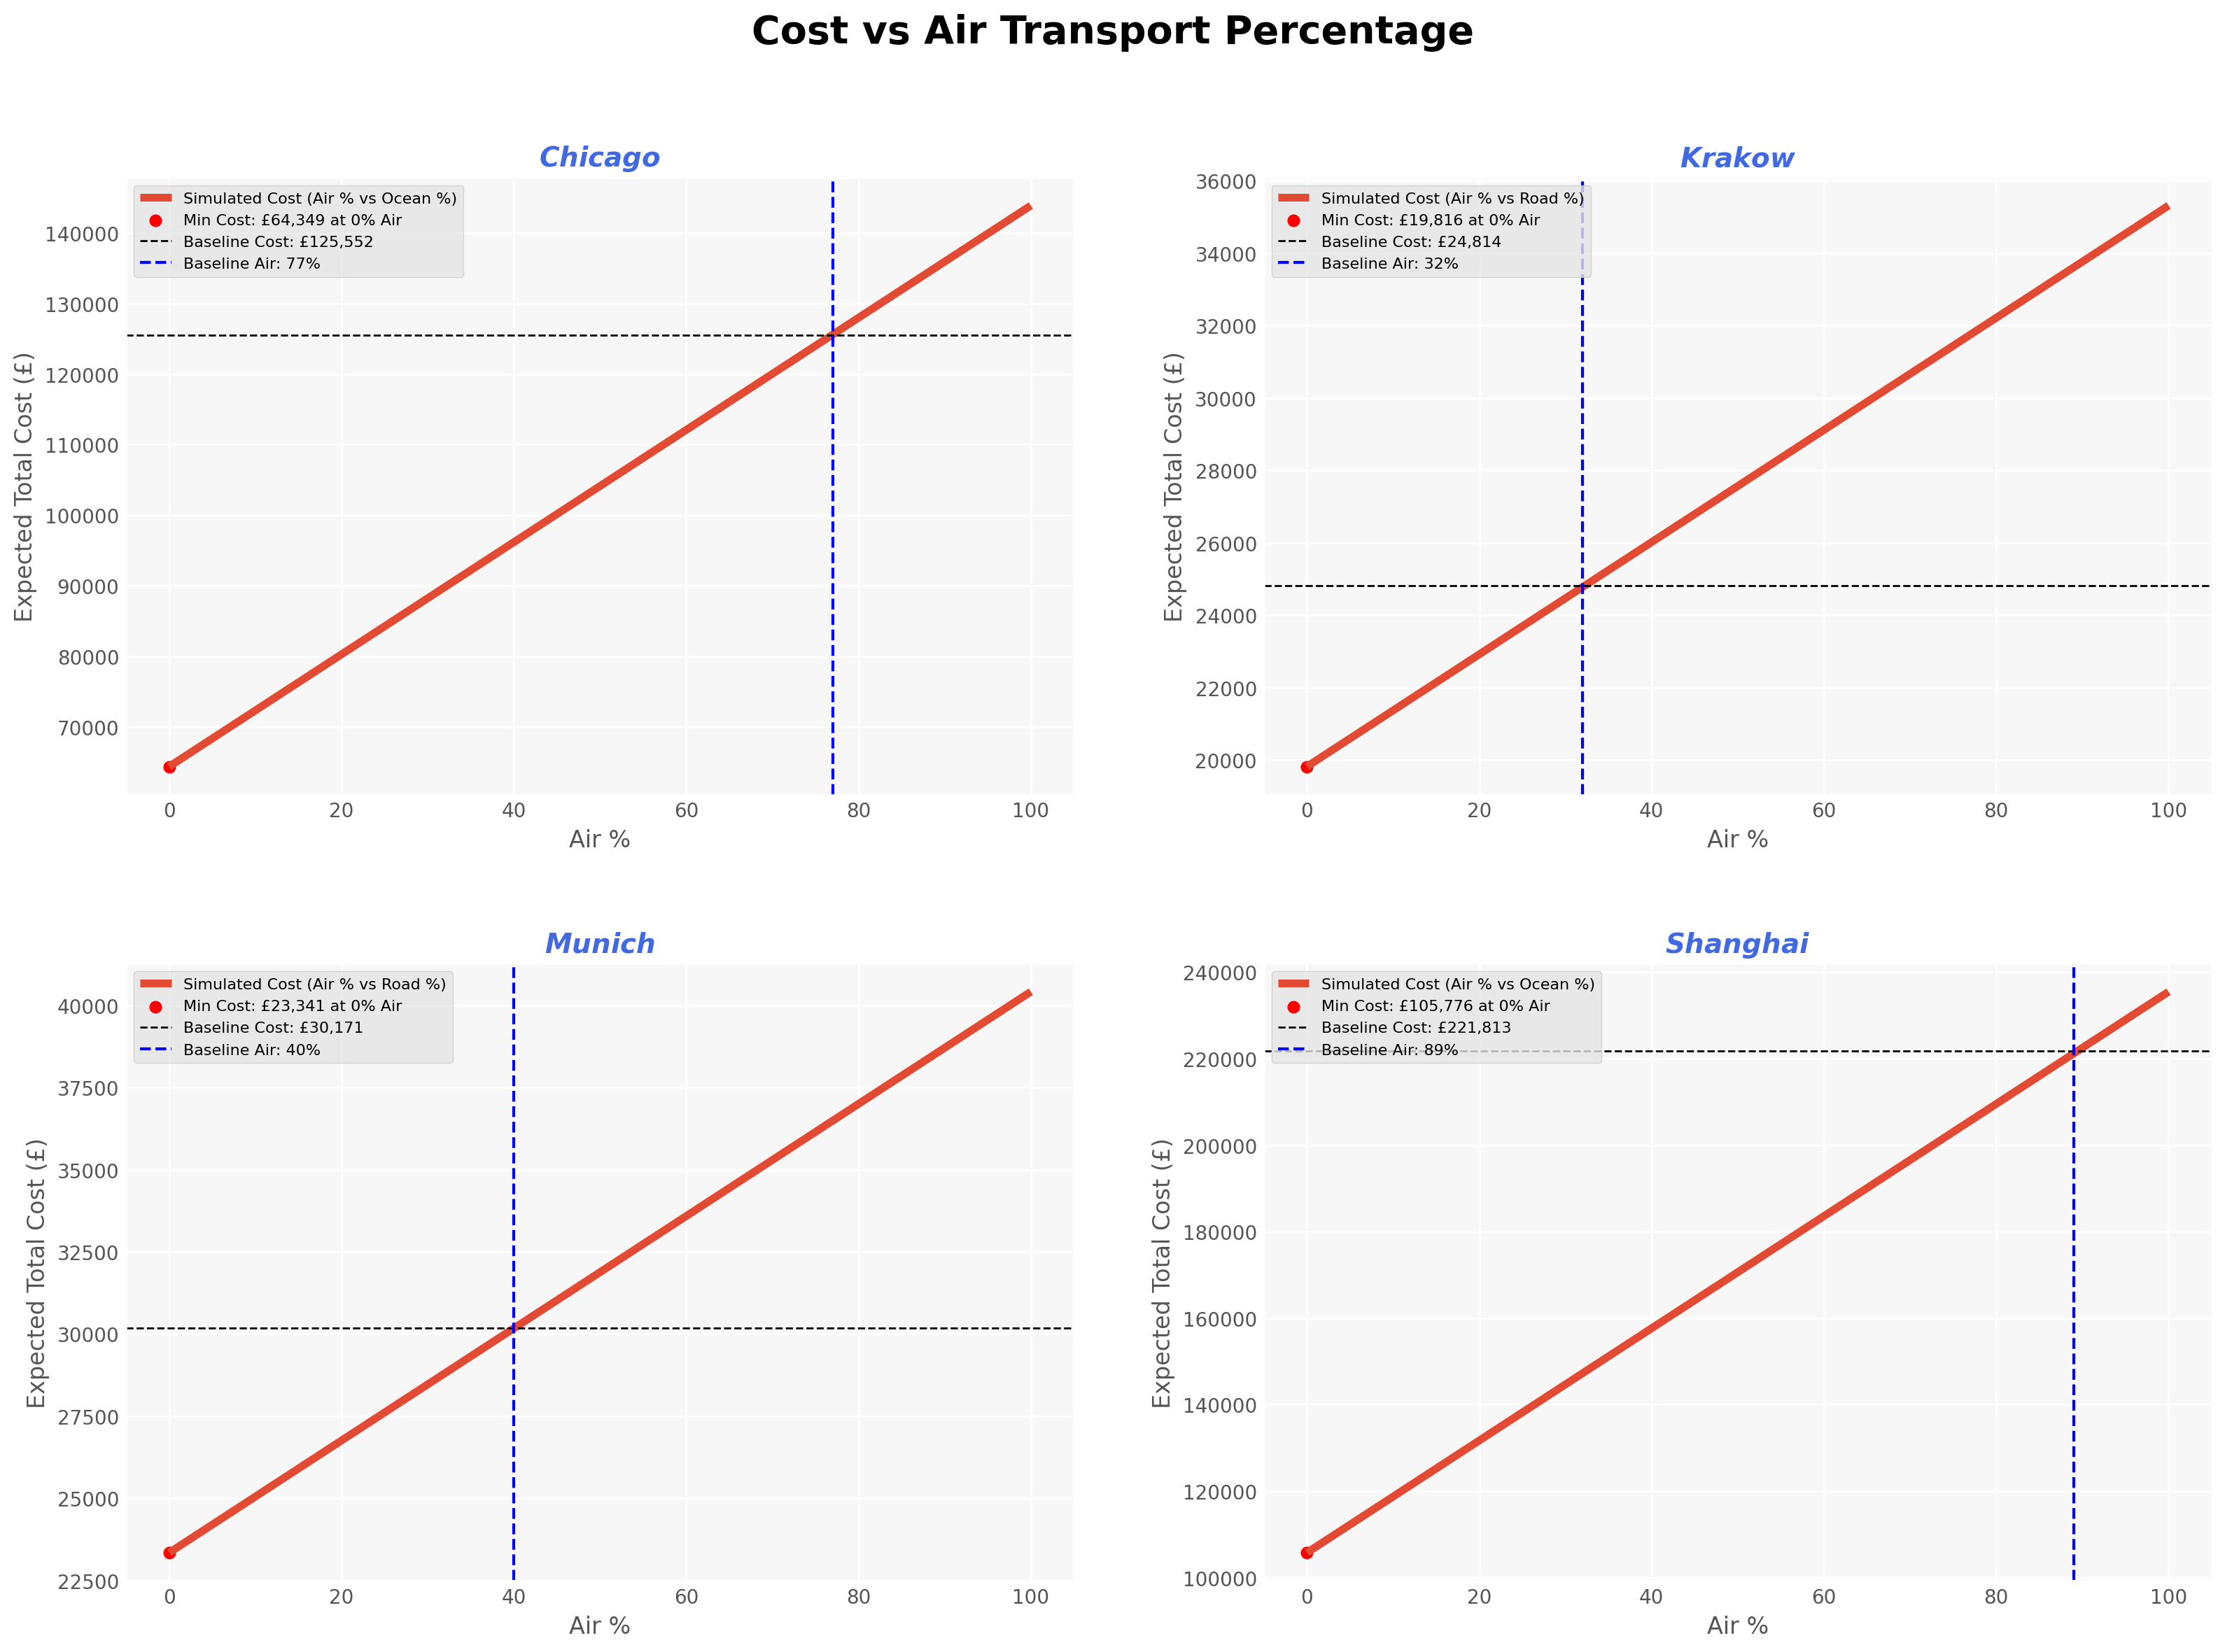

In [ ]:


# 1. Split simulation_df by destination and reset index
chicago_df = simulation_df[simulation_df['Destination'] == 'Chicago'].reset_index(drop=True)
krakow_df = simulation_df[simulation_df['Destination'] == 'Krakow'].reset_index(drop=True)
munich_df = simulation_df[simulation_df['Destination'] == 'Munich'].reset_index(drop=True)
shanghai_df = simulation_df[simulation_df['Destination'] == 'Shanghai'].reset_index(drop=True)

destinations = simulation_df['Destination'].unique()

# Set up 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12),dpi=200)
axes = axes.flatten()

fig.suptitle("Cost vs Air Transport Percentage", fontsize=20, fontweight='bold')


for i, destination in enumerate(destinations):
    ax = axes[i]

    dest_df = simulation_df[simulation_df['Destination'] == destination]
    mode_columns = sorted([col for col in dest_df.columns if col.endswith('%') and not dest_df[col].isnull().all()])
    mode1 = mode_columns[0]
    mode2 = mode_columns[1]

    # Light background color for each subplot
    ax.set_facecolor('#f7f7f7')

    # Plot
    ax.plot(dest_df[mode1], dest_df['Expected Total Cost (£)'], label=f'Simulated Cost ({mode1} vs {mode2})')


    min_idx = dest_df['Expected Total Cost (£)'].idxmin()
    best_x = dest_df.loc[min_idx, mode1]
    best_y = dest_df.loc[min_idx, 'Expected Total Cost (£)']
    ax.scatter(best_x, best_y, color='red', label=f'Min Cost: £{best_y:,.0f} at {best_x:.0f}% {mode1[:-2]}')

    # add abseline cost horizontal line
    baseline_cost = summary.query("Destination == @destination")['total_cost'].sum()
    ax.axhline(baseline_cost, color='black', linestyle='--', linewidth=1, label=f'Baseline Cost: £{baseline_cost:,.0f}')

    # add vertical line baseline air transport percentage
    baseline_air_percentage = summary.query(
        "Destination == @destination and Transportation_Mode == 'Air'"
    )['percentage_transport'].values[0] * 100
    ax.axvline(baseline_air_percentage, color='blue', linestyle='--', linewidth=1.5, label=f'Baseline Air: {baseline_air_percentage:.0f}%')

    # Title (Destination in bold italic, colored)
    ax.set_title(rf"$\mathbfit{{{destination}}}$", fontsize=14, color='royalblue')

    ax.set_xlabel(f'{mode1}')
    ax.set_ylabel('Expected Total Cost (£)')
    ax.grid(True)
    ax.legend(
    loc='upper left', 
    fontsize=8, 
    framealpha=0.8  # transparency: 0 = fully transparent, 1 = fully opaque
    )


# Hide any unused subplots if fewer than 4 destinations
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=4, w_pad=4)
plt.show()


### Optimisation Formulation

-  $O$ = set of origins (only Stockholm here)
-  $D$ = set of destinations (Chicago, Krakow, Munich, Shanghai)
-  $M$ = set of transport modes (Air, Ocean, Road)
-  $(o, d, m)$ = a shipment from origin  $o$ to destination  $d$ using mode  $m$

-  $\text{fixed\_cost}_m$ = fixed cost per km for mode  $m$
-  $\text{variable\_cost}_m$ = variable cost per kg for mode  $m$
-  $\text{distance}_{o,d}$ = distance between origin  $o$ and destination  $d$ (in km)
-  $\text{weight}_{o,d}$ = weight of shipment from  $o$ to  $d$ (in kg)
-  $\text{transport\_time}_{o,d,m}$ = transport time from  $o$ to  $d$ using mode  $m$ (in days)
-  $\text{max\_lead\_time}$ = maximum allowable lead time under the scenario

Objective:
$$
\text{Minimize} \quad \sum_{o,d,m} x_{o,d,m} \left( \text{fixed\_cost}_m \times \text{distance}_{o,d} + \text{variable\_cost}_m \times \text{weight}_{o,d} \right)
$$

subject to:

$$
\sum_{m} x_{o,d,m} = 1 \quad \forall (o,d)
$$

$$
x_{o,d,m} \in \{0,1\} \quad \forall (o,d,m) \quad 
$$

$$
\text{transport\_time}_{o,d,m} \leq \text{max\_lead\_time}
$$

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryanabsar/Documents/02. Education/01. Imperial College London - BA/01. Modules/03. Summer Semester/01. AIB/AIB-Capstone-Project/venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/9s/vnh0yrb52292pp21phjjlqpm0000gn/T/47416bcede0940e395ddc2cecc4172a3-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/9s/vnh0yrb52292pp21phjjlqpm0000gn/T/47416bcede0940e395ddc2cecc4172a3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 42 RHS
At line 47 BOUNDS
At line 56 ENDATA
Problem MODEL has 4 rows, 8 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13588.8 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
C

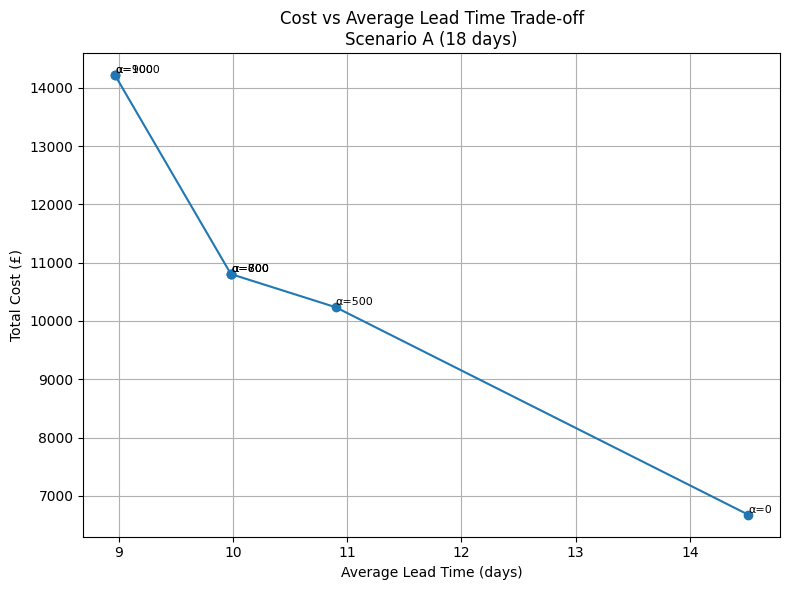

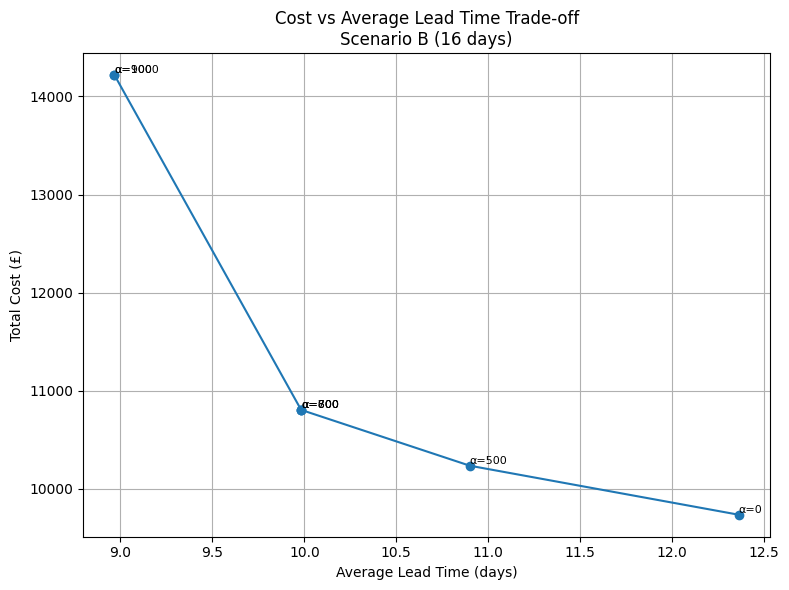

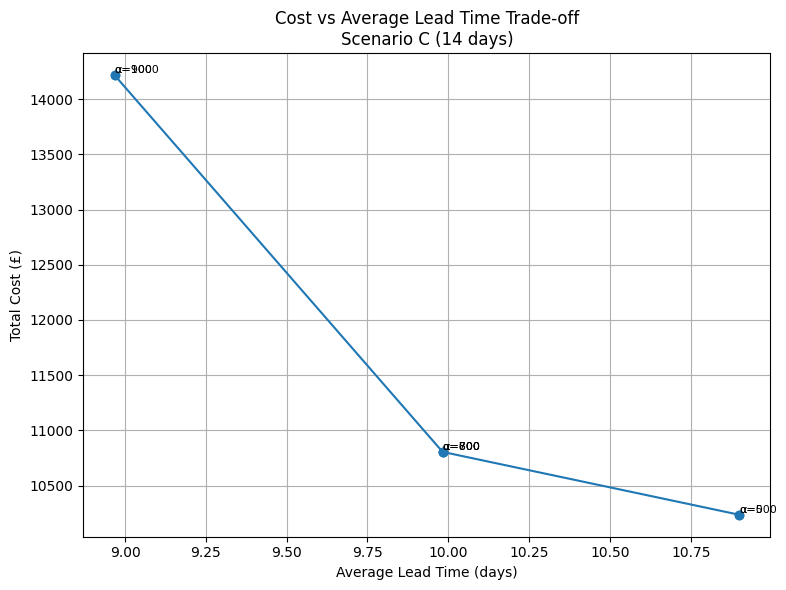

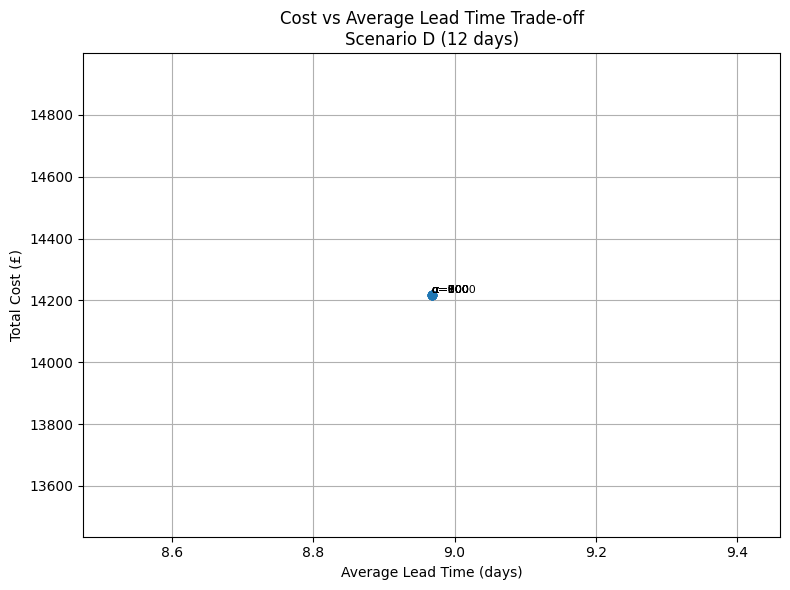

In [224]:
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary
import pandas as pd

# --- Data ---

# Transportation costs
transport_costs = {
    'Air': {'fixed': 0.75, 'variable': 0.30},
    'Ocean': {'fixed': 0.35, 'variable': 0.05},
    'Road': {'fixed': 0.50, 'variable': 0.10}
}

# Correct Lead Times (in days) you provided
lead_times = {
    ('Stockholm', 'Chicago', 'Air'): 7.90,
    ('Stockholm', 'Chicago', 'Ocean'): 16.50,
    ('Stockholm', 'Krakow', 'Air'): 8.20,
    ('Stockholm', 'Krakow', 'Road'): 14.05,
    ('Stockholm', 'Munich', 'Air'): 9.83,
    ('Stockholm', 'Munich', 'Road'): 13.50,
    ('Stockholm', 'Shanghai', 'Air'): 9.94,
    ('Stockholm', 'Shanghai', 'Ocean'): 14.00
}

# Shipment data: (origin, destination, weight (kg), distance (km))
shipments_data = [
    ('Stockholm', 'Chicago', 1201, 6899.8),
    ('Stockholm', 'Krakow', 1201, 1038.3),
    ('Stockholm', 'Munich', 1201, 1315.9),
    ('Stockholm', 'Shanghai', 1201, 7781.5)
]

# Lookup table
shipment_lookup = {(origin, destination): (weight, distance) for origin, destination, weight, distance in shipments_data}

# Define lead time limit scenarios
scenarios = {
    'Scenario A (18 days)': 18,
    'Scenario B (16 days)': 16,
    'Scenario C (14 days)': 14,
    'Scenario D (12 days)': 12,
}

# Alpha values to test (weighting between cost and time)
alpha_values = [0, 500, 600, 700,800, 900, 1000]

# Store all results
all_results = []

# --- Optimization Loop ---
for scenario_name, max_lead_time in scenarios.items():
    for alpha in alpha_values:
        model = LpProblem(f"Transport_Cost_Optimization_{scenario_name}_alpha_{alpha}", LpMinimize)

        # Decision variables
        x = {}
        for origin, destination, weight, distance in shipments_data:
            for mode in transport_costs:
                if (origin, destination, mode) in lead_times:
                    if lead_times[(origin, destination, mode)] <= max_lead_time:
                        var_name = f"x_{origin}_{destination}_{mode}_{scenario_name}_alpha_{alpha}"
                        x[(origin, destination, mode)] = LpVariable(var_name, cat=LpBinary)

        # Objective function: minimize cost + alpha * lead time
        model += lpSum(
            x[(origin, destination, mode)] * (
                transport_costs[mode]['fixed'] * distance +
                transport_costs[mode]['variable'] * weight +
                alpha * lead_times[(origin, destination, mode)]
            )
            for (origin, destination, mode) in x
        )

        # Constraints: one mode per shipment
        for origin, destination, weight, distance in shipments_data:
            valid_modes = [mode for mode in transport_costs
                           if (origin, destination, mode) in lead_times
                           and lead_times[(origin, destination, mode)] <= max_lead_time]
            if valid_modes:
                model += lpSum(x[(origin, destination, mode)] for mode in valid_modes) == 1

        # Solve the model
        model.solve()

        # Calculate total cost and average lead time
        total_cost = 0
        selected_lead_times = []

        for (origin, destination, mode), var in x.items():
            if var.varValue == 1:
                weight, distance = shipment_lookup[(origin, destination)]
                total_cost += transport_costs[mode]['fixed'] * distance + transport_costs[mode]['variable'] * weight
                selected_lead_times.append(lead_times[(origin, destination, mode)])

        # Avoid division by zero
        if selected_lead_times:
            average_lead_time = sum(selected_lead_times) / len(selected_lead_times)
        else:
            average_lead_time = None  # In case of infeasibility

        all_results.append({
            'Scenario': scenario_name,
            'Alpha': alpha,
            'Total Cost (£)': total_cost,
            'Average Lead Time (days)': average_lead_time
        })

# --- Plotting ---
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Create plots
for scenario_name in results_df['Scenario'].unique():
    scenario_data = results_df[results_df['Scenario'] == scenario_name]

    plt.figure(figsize=(8, 6))
    plt.plot(scenario_data['Average Lead Time (days)'], scenario_data['Total Cost (£)'], marker='o')
    for idx, row in scenario_data.iterrows():
        plt.text(row['Average Lead Time (days)'], row['Total Cost (£)'], f"α={row['Alpha']}", fontsize=8, ha='left', va='bottom')

    plt.title(f'Cost vs Average Lead Time Trade-off\n{scenario_name}')
    plt.xlabel('Average Lead Time (days)')
    plt.ylabel('Total Cost (£)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [205]:
result = pd.DataFrame(all_results)
result


,Scenario,Origin,Destination,Selected Mode,Fixed Cost (£),Variable Cost (£),Total Cost (£),Transport Time (days)
0,Scenario A (20 days),Stockholm,Chicago,Ocean,2414.93,60.05,2474.98,14.67
1,Scenario A (20 days),Stockholm,Krakow,Road,519.15,120.10,639.25,8.24
2,Scenario A (20 days),Stockholm,Munich,Road,657.95,120.10,778.05,8.78
3,Scenario A (20 days),Stockholm,Shanghai,Ocean,2723.52,60.05,2783.57,13.50
4,Scenario B (15 days),Stockholm,Chicago,Ocean,2414.93,60.05,2474.98,14.67
5,Scenario B (15 days),Stockholm,Krakow,Road,519.15,120.10,639.25,8.24
6,Scenario B (15 days),Stockholm,Munich,Road,657.95,120.10,778.05,8.78
7,Scenario B (15 days),Stockholm,Shanghai,Ocean,2723.52,60.05,2783.57,13.50
8,Scenario C (10 days),Stockholm,Chicago,Air,5174.85,360.30,5535.15,3.45
9,Scenario C (10 days),Stockholm,Krakow,Road,519.15,120.10,639.25,8.24


In [206]:
result.groupby(['Scenario'])['Total Cost (£)'].sum().reset_index()

,Scenario,Total Cost (£)
0,Scenario A (20 days),6675.85
1,Scenario B (15 days),6675.85
2,Scenario C (10 days),13148.88
3,Scenario D (5 days),14217.83


/Users/ryanabsar/Documents/02. Education/01. Imperial College London - BA/01. Modules/03. Summer Semester/01. AIB/AIB-Capstone-Project/venv/lib/python3.13/site-packages/pulp/pulp.py:1424: UserWarning:

Spaces are not permitted in the name. Converted to '_'



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ryanabsar/Documents/02. Education/01. Imperial College London - BA/01. Modules/03. Summer Semester/01. AIB/AIB-Capstone-Project/venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/9s/vnh0yrb52292pp21phjjlqpm0000gn/T/3f48836e87a8437c98c8231ca18bc761-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/9s/vnh0yrb52292pp21phjjlqpm0000gn/T/3f48836e87a8437c98c8231ca18bc761-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 42 RHS
At line 47 BOUNDS
At line 56 ENDATA
Problem MODEL has 4 rows, 8 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13588.8 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
C

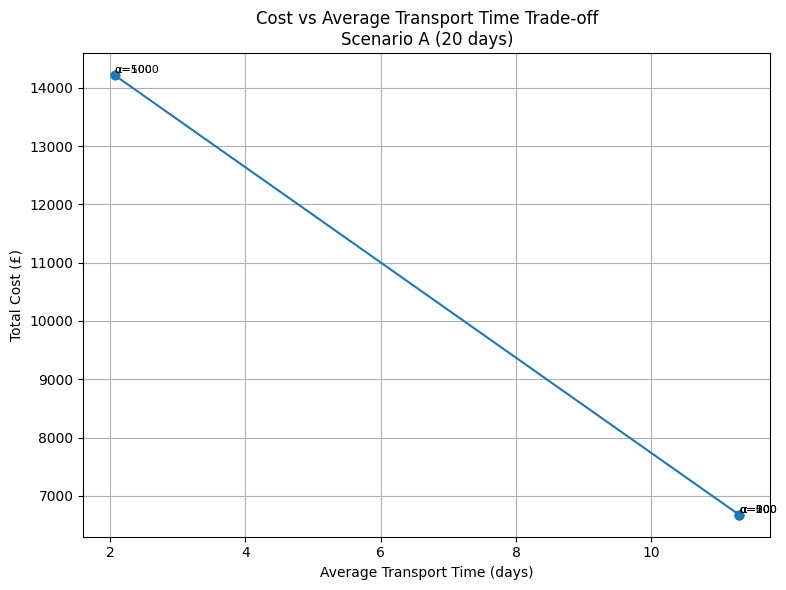

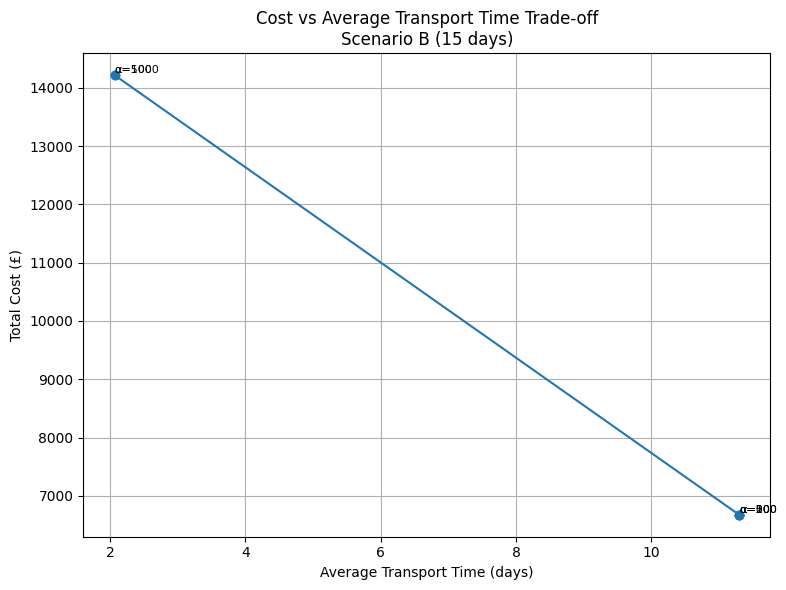

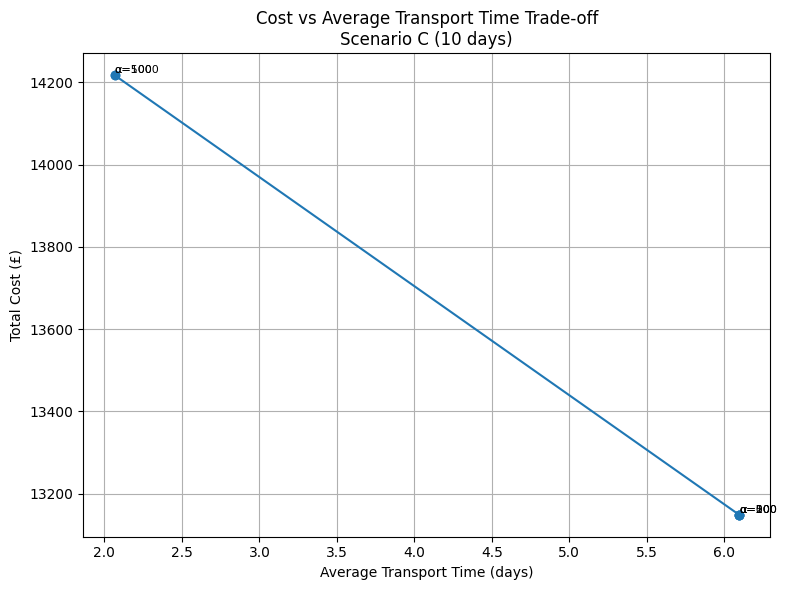

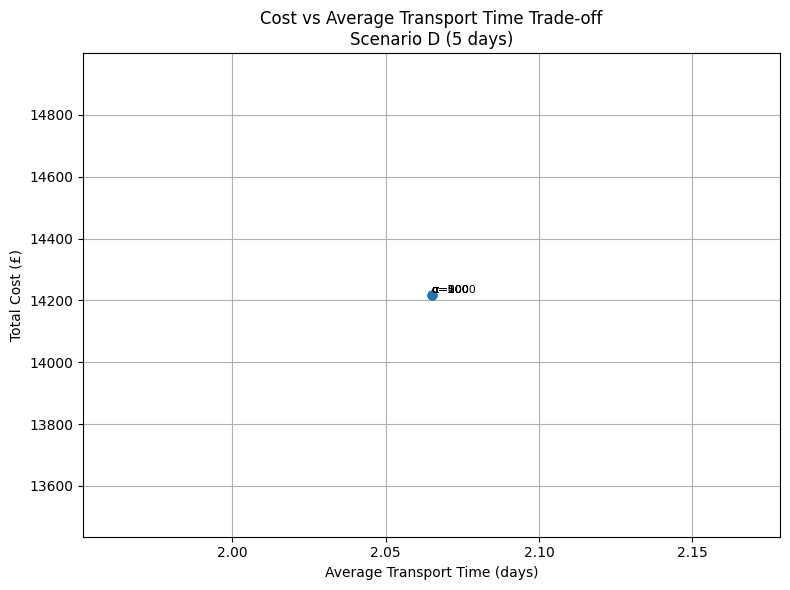

In [208]:
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary
import pandas as pd

# --- Data ---

# Transportation costs
transport_costs = {
    'Air': {'fixed': 0.75, 'variable': 0.30},
    'Ocean': {'fixed': 0.35, 'variable': 0.05},
    'Road': {'fixed': 0.50, 'variable': 0.10}
}

# Transportation times (in days)
transport_times = {
    ('Stockholm', 'Chicago', 'Air'): 3.45,
    ('Stockholm', 'Chicago', 'Ocean'): 14.67,
    ('Stockholm', 'Krakow', 'Air'): 0.40,
    ('Stockholm', 'Krakow', 'Road'): 8.24,
    ('Stockholm', 'Munich', 'Air'): 0.50,
    ('Stockholm', 'Munich', 'Road'): 8.78,
    ('Stockholm', 'Shanghai', 'Air'): 3.91,
    ('Stockholm', 'Shanghai', 'Ocean'): 13.50
}

# Shipment data: (origin, destination, weight (kg), distance (km))
shipments_data = [
    ('Stockholm', 'Chicago', 1201, 6899.8),
    ('Stockholm', 'Krakow', 1201, 1038.3),
    ('Stockholm', 'Munich', 1201, 1315.9),
    ('Stockholm', 'Shanghai', 1201, 7781.5)
]

# Lookup table
shipment_lookup = {(origin, destination): (weight, distance) for origin, destination, weight, distance in shipments_data}

# Define lead time scenarios
scenarios = {
    'Scenario A (20 days)': 20,
    'Scenario B (15 days)': 15,
    'Scenario C (10 days)': 10,
    'Scenario D (5 days)': 5,
}

# Alpha values to test
alpha_values = [0, 50, 100, 200, 500, 1000]

# Store all results
all_results = []

# --- Optimization Loop ---
for scenario_name, max_lead_time in scenarios.items():
    for alpha in alpha_values:
        model = LpProblem(f"Transport_Cost_Optimization_{scenario_name}_alpha_{alpha}", LpMinimize)

        # Decision variables
        x = {}
        for origin, destination, weight, distance in shipments_data:
            for mode in transport_costs:
                if (origin, destination, mode) in transport_times:
                    if transport_times[(origin, destination, mode)] <= max_lead_time:
                        var_name = f"x_{origin}_{destination}_{mode}_{scenario_name}_alpha_{alpha}"
                        x[(origin, destination, mode)] = LpVariable(var_name, cat=LpBinary)

        # Objective function: cost + alpha * transport time
        model += lpSum(
            x[(origin, destination, mode)] * (
                transport_costs[mode]['fixed'] * distance +
                transport_costs[mode]['variable'] * weight +
                alpha * transport_times[(origin, destination, mode)]
            )
            for (origin, destination, mode) in x
        )

        # Constraints: one mode per shipment
        for origin, destination, weight, distance in shipments_data:
            valid_modes = [mode for mode in transport_costs
                           if (origin, destination, mode) in transport_times
                           and transport_times[(origin, destination, mode)] <= max_lead_time]
            if valid_modes:
                model += lpSum(x[(origin, destination, mode)] for mode in valid_modes) == 1

        # Solve the model
        model.solve()

        # Calculate total cost and average transport time
        total_cost = 0
        selected_times = []

        for (origin, destination, mode), var in x.items():
            if var.varValue == 1:
                weight, distance = shipment_lookup[(origin, destination)]
                total_cost += transport_costs[mode]['fixed'] * distance + transport_costs[mode]['variable'] * weight
                selected_times.append(transport_times[(origin, destination, mode)])

        # Avoid division by zero
        if selected_times:
            average_transport_time = sum(selected_times) / len(selected_times)
        else:
            average_transport_time = None  # If no feasible solution

        all_results.append({
            'Scenario': scenario_name,
            'Alpha': alpha,
            'Total Cost (£)': total_cost,
            'Average Transport Time (days)': average_transport_time
        })

# --- Plotting ---
# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Create plots
for scenario_name in results_df['Scenario'].unique():
    scenario_data = results_df[results_df['Scenario'] == scenario_name]

    plt.figure(figsize=(8, 6))
    plt.plot(scenario_data['Average Transport Time (days)'], scenario_data['Total Cost (£)'], marker='o')
    for idx, row in scenario_data.iterrows():
        plt.text(row['Average Transport Time (days)'], row['Total Cost (£)'], f"α={row['Alpha']}", fontsize=8, ha='left', va='bottom')

    plt.title(f'Cost vs Average Transport Time Trade-off\n{scenario_name}')
    plt.xlabel('Average Transport Time (days)')
    plt.ylabel('Total Cost (£)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
